In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
from scipy.stats import linregress
import scipy.stats as st

# Census Api Key
from config import (api_key)


In [2]:
years=[2013,2014,2015,2016,2017,2018]

# Names for your columns
column1 = "Mean of Trans by Age"
column2 = "Travel Time to Work"
column3 = "Population"

census_pd = pd.DataFramestates_list=()
years_df = pd.DataFrame()

states_list=[]
years_list=[]
column1_data =[]
column2_data =[]
column3_data =[]


for y in years:
    c = Census(api_key, year=y)

    census_data = c.acs5.get(("NAME", "B08101_001E", "B08303_001E", "B01003_001E" ), {'for': 'state:06,48,12,08,16,41'})

# Convert to DataFrame
    census_pd = pd.DataFrame(census_data).sort_values("NAME",ascending=True)
    census_pd = census_pd.reset_index()
    
    year_column=[]
    for i in range(len(census_pd["state"])):
        year_column.append(y)
    
    
    states_list.extend(census_pd["NAME"].tolist())
    years_list.extend(year_column)
    column1_data.extend(census_pd["B08101_001E"].tolist())
    column2_data.extend(census_pd["B08303_001E"].tolist())
    column3_data.extend(census_pd["B01003_001E"].tolist())    
    
#print(years_list)
#print(states_list)

years_df["Year"] = years_list
years_df["State Name"] = states_list
years_df[column1] = column1_data
years_df[column2] = column2_data
years_df[column3] = column3_data
    
years_df


,Year,State Name,Mean of Trans by Age,Travel Time to Work,Population
0,2013,California,16290887.0,15437979.0,37659181.0
1,2013,Colorado,2494794.0,2331060.0,5119329.0
2,2013,Florida,8094220.0,7706393.0,19091156.0
3,2013,Idaho,684393.0,645127.0,1583364.0
4,2013,Oregon,1700451.0,1591348.0,3868721.0
5,2013,Texas,11445014.0,10983502.0,25639373.0
6,2014,California,16529777.0,15658667.0,38066920.0
7,2014,Colorado,2544021.0,2377653.0,5197580.0
8,2014,Florida,8228557.0,7823816.0,19361792.0
9,2014,Idaho,691425.0,650493.0,1599464.0


In [3]:
# Set x axis and tick locations
x_axis = np.arange(len(years_df))
tick_locations = [value+0.4 for value in x_axis]

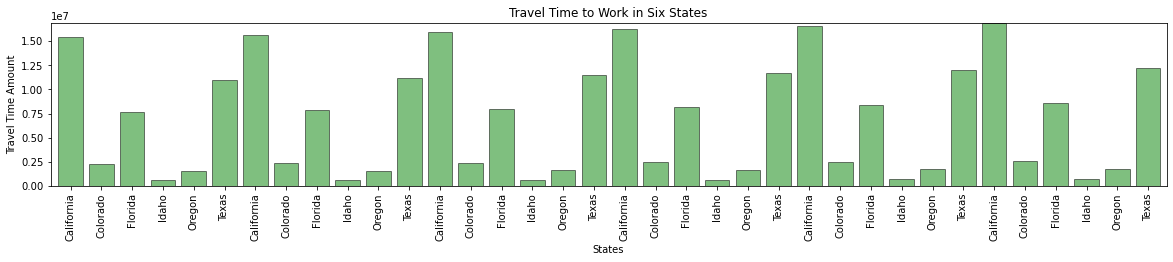

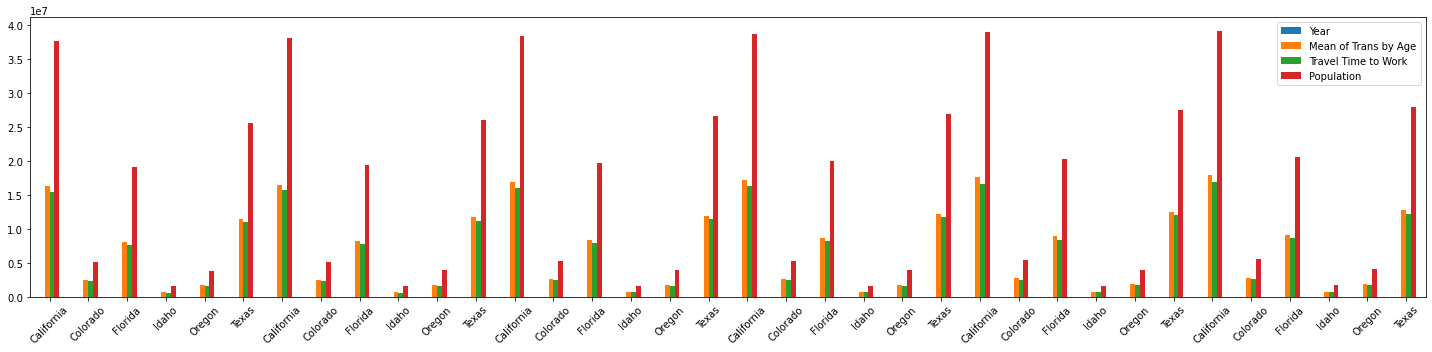

In [4]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, years_df[column2], facecolor='green',edgecolor='black', alpha=0.5, align="edge")
plt.xticks(tick_locations, years_df["State Name"], rotation="vertical")
# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(years_df[column2])+10)
# Set a Title and labels
plt.title("Travel Time to Work in Six States")
plt.xlabel("States")
plt.ylabel("Travel Time Amount")

multi_plot = years_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(years_df["State Name"], rotation=45)

#plt.show()
plt.tight_layout()

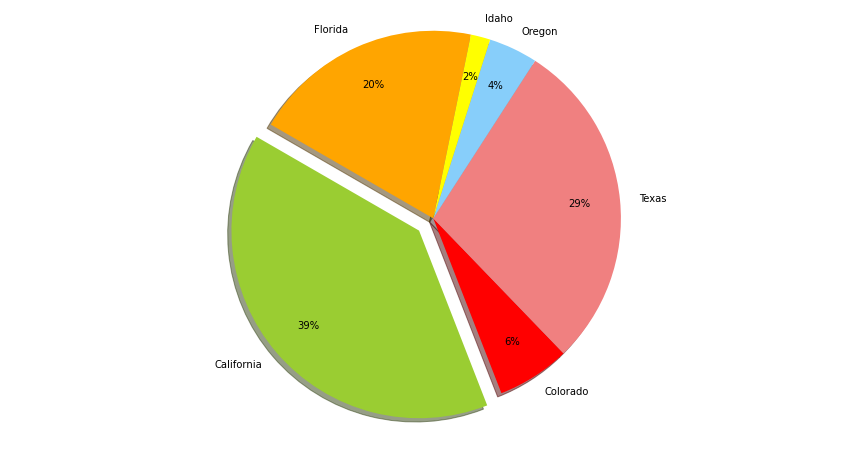

In [18]:
# DATA SET 3
labels = ["California", "Colorado", "Texas", "Oregon", "Idaho", "Florida"]
time_to_work = [17589758,2822072,12842820,1895393,757408,8907171]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "yellow", "orange"]
explode = (0.1,0,0,0,0,0)
fig = plt.figure(figsize = (15, 8))
plt.pie(time_to_work, explode=explode, labels=labels, colors=colors,
        autopct="%1.0f%%", pctdistance=0.78, labeldistance=1.1, shadow=True, startangle=150)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()